In [ ]:
import pandas as pd
import numpy as np
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
wealthier = pd.DataFrame()
for i in range(1,5):
  filepath = f'/content/drive/My Drive/Colab Notebooks/Data/Features_Paipa/features_wealthier_{i}.csv'
  df_t = pd.read_csv(filepath)
  wealthier = pd.concat([wealthier, df_t],axis = 0)

In [ ]:
wealthier

,image_id,features
0,50f43b92fdc9f065f000323f,"[0.14511393010616302, 0.67796790599823, 0.1168..."
1,51415042fdc9f04926007cd6,"[0.264373242855072, 0.5565234422683716, 0.0082..."
2,5139292a818ede129600112f,"[0.044346727430820465, 0.6734756827354431, 0.0..."
3,50f42c6efdc9f065f0001c30,"[0.10744793713092804, 0.648747980594635, 0.047..."
4,513e6f4cfdc9f0358700c558,"[0.3608890473842621, 0.724132776260376, 0.1300..."
...,...,...
4995,51414e8afdc9f0492600788d,"[0.2376347929239273, 0.7202961444854736, 0.014..."
4996,513cba54fdc9f03587000dcc,"[0.22871175408363342, 0.5206001996994019, 0.03..."
4997,514093fafdc9f0492600082a,"[0.24426262080669403, 0.3581869602203369, 0.39..."
4998,513d9e19fdc9f035870082c8,"[0.2421446442604065, 0.9797423481941223, 0.036..."


In [ ]:
df_q = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/new_qscores.csv')

# Filter the DataFrame
filtered_df = df_q[df_q['study_question'] == 'wealthier']
filtered_df = filtered_df.drop(['_id', 'num_votes', 'place_id', 'study_id'], axis = 1)
df_result = pd.merge(filtered_df, wealthier, left_on='location_id', right_on = 'image_id')
df_cleaned = df_result.dropna(subset=['features'])
df_cleaned

,location_id,trueskill.score,trueskill.stds.-1,study_question,image_id,features
0,50f43b92fdc9f065f000323f,20.483692,6.879156,wealthier,50f43b92fdc9f065f000323f,"[0.14511393010616302, 0.67796790599823, 0.1168..."
1,51415042fdc9f04926007cd6,30.190317,4.859436,wealthier,51415042fdc9f04926007cd6,"[0.264373242855072, 0.5565234422683716, 0.0082..."
2,5139292a818ede129600112f,29.522494,5.329589,wealthier,5139292a818ede129600112f,"[0.044346727430820465, 0.6734756827354431, 0.0..."
3,50f42c6efdc9f065f0001c30,26.329670,5.941516,wealthier,50f42c6efdc9f065f0001c30,"[0.10744793713092804, 0.648747980594635, 0.047..."
4,513e6f4cfdc9f0358700c558,19.379138,5.801421,wealthier,513e6f4cfdc9f0358700c558,"[0.3608890473842621, 0.724132776260376, 0.1300..."
...,...,...,...,...,...,...
19995,51414e8afdc9f0492600788d,30.161729,4.928724,wealthier,51414e8afdc9f0492600788d,"[0.2376347929239273, 0.7202961444854736, 0.014..."
19996,513cba54fdc9f03587000dcc,23.926482,5.277779,wealthier,513cba54fdc9f03587000dcc,"[0.22871175408363342, 0.5206001996994019, 0.03..."
19997,514093fafdc9f0492600082a,31.318667,3.721282,wealthier,514093fafdc9f0492600082a,"[0.24426262080669403, 0.3581869602203369, 0.39..."
19998,513d9e19fdc9f035870082c8,26.092830,4.273790,wealthier,513d9e19fdc9f035870082c8,"[0.2421446442604065, 0.9797423481941223, 0.036..."


In [ ]:
# wealthier_df = final_data_frames['wealthier']
# beautiful_df = final_data_frames['more beautiful']
# livelier_df = final_data_frames['livelier']
# boring_df = final_data_frames['more boring']
# safer_df = final_data_frames['safer']
# depressing_df = final_data_frames['more depressing']

In [ ]:
df = df_cleaned
df = df.rename(columns={'trueskill.score': 'Q'})
df

,location_id,Q,trueskill.stds.-1,study_question,image_id,features
0,50f43b92fdc9f065f000323f,20.483692,6.879156,wealthier,50f43b92fdc9f065f000323f,"[0.14511393010616302, 0.67796790599823, 0.1168..."
1,51415042fdc9f04926007cd6,30.190317,4.859436,wealthier,51415042fdc9f04926007cd6,"[0.264373242855072, 0.5565234422683716, 0.0082..."
2,5139292a818ede129600112f,29.522494,5.329589,wealthier,5139292a818ede129600112f,"[0.044346727430820465, 0.6734756827354431, 0.0..."
3,50f42c6efdc9f065f0001c30,26.329670,5.941516,wealthier,50f42c6efdc9f065f0001c30,"[0.10744793713092804, 0.648747980594635, 0.047..."
4,513e6f4cfdc9f0358700c558,19.379138,5.801421,wealthier,513e6f4cfdc9f0358700c558,"[0.3608890473842621, 0.724132776260376, 0.1300..."
...,...,...,...,...,...,...
19995,51414e8afdc9f0492600788d,30.161729,4.928724,wealthier,51414e8afdc9f0492600788d,"[0.2376347929239273, 0.7202961444854736, 0.014..."
19996,513cba54fdc9f03587000dcc,23.926482,5.277779,wealthier,513cba54fdc9f03587000dcc,"[0.22871175408363342, 0.5206001996994019, 0.03..."
19997,514093fafdc9f0492600082a,31.318667,3.721282,wealthier,514093fafdc9f0492600082a,"[0.24426262080669403, 0.3581869602203369, 0.39..."
19998,513d9e19fdc9f035870082c8,26.092830,4.273790,wealthier,513d9e19fdc9f035870082c8,"[0.2421446442604065, 0.9797423481941223, 0.036..."


In [ ]:
# 设置δ值为0.5
delta = 0.6


# 计算Q值的平均值和标准差
mu = df['Q'].mean()
sigma = df['Q'].std()

# 定义阈值
lower_threshold = mu - delta * sigma
upper_threshold = mu + delta * sigma

# 创建一个新列用于二元分类标签
df['Q_label'] = np.where(df['Q'] <= lower_threshold, -1,
                          np.where(df['Q'] >= upper_threshold, 1, np.nan))
print(df.head())
# 删除噪声数据（介于两个阈值之间的Q值）
df = df.dropna(subset=['Q_label'])
# 输出结果
print(f"Processed with δ = {delta}:")
print(f"Lower Threshold: {lower_threshold}, Upper Threshold: {upper_threshold}")

                location_id          Q  trueskill.stds.-1 study_question  \
0  50f43b92fdc9f065f000323f  20.483692           6.879156      wealthier   
1  51415042fdc9f04926007cd6  30.190317           4.859436      wealthier   
2  5139292a818ede129600112f  29.522494           5.329589      wealthier   
3  50f42c6efdc9f065f0001c30  26.329670           5.941516      wealthier   
4  513e6f4cfdc9f0358700c558  19.379138           5.801421      wealthier   

                   image_id  \
0  50f43b92fdc9f065f000323f   
1  51415042fdc9f04926007cd6   
2  5139292a818ede129600112f   
3  50f42c6efdc9f065f0001c30   
4  513e6f4cfdc9f0358700c558   

                                            features  Q_label  
0  [0.14511393010616302, 0.67796790599823, 0.1168...     -1.0  
1  [0.264373242855072, 0.5565234422683716, 0.0082...      1.0  
2  [0.044346727430820465, 0.6734756827354431, 0.0...      1.0  
3  [0.10744793713092804, 0.648747980594635, 0.047...      NaN  
4  [0.3608890473842621, 0.7241327762

In [ ]:
df

,location_id,Q,trueskill.stds.-1,study_question,image_id,features,Q_label
0,50f43b92fdc9f065f000323f,20.483692,6.879156,wealthier,50f43b92fdc9f065f000323f,"[0.14511393010616302, 0.67796790599823, 0.1168...",-1.0
1,51415042fdc9f04926007cd6,30.190317,4.859436,wealthier,51415042fdc9f04926007cd6,"[0.264373242855072, 0.5565234422683716, 0.0082...",1.0
2,5139292a818ede129600112f,29.522494,5.329589,wealthier,5139292a818ede129600112f,"[0.044346727430820465, 0.6734756827354431, 0.0...",1.0
4,513e6f4cfdc9f0358700c558,19.379138,5.801421,wealthier,513e6f4cfdc9f0358700c558,"[0.3608890473842621, 0.724132776260376, 0.1300...",-1.0
5,513d6aa5fdc9f03587004b07,31.554906,6.172589,wealthier,513d6aa5fdc9f03587004b07,"[0.23794478178024292, 1.0654220581054688, 0.07...",1.0
...,...,...,...,...,...,...,...
19993,51408bacfdc9f0358700e99d,29.803318,5.002268,wealthier,51408bacfdc9f0358700e99d,"[0.5276564955711365, 0.7481556534767151, 0.098...",1.0
19994,50f6166dbeb2fed91000081c,18.048591,6.331033,wealthier,50f6166dbeb2fed91000081c,"[0.2000744491815567, 0.5103228688240051, 0.048...",-1.0
19995,51414e8afdc9f0492600788d,30.161729,4.928724,wealthier,51414e8afdc9f0492600788d,"[0.2376347929239273, 0.7202961444854736, 0.014...",1.0
19997,514093fafdc9f0492600082a,31.318667,3.721282,wealthier,514093fafdc9f0492600082a,"[0.24426262080669403, 0.3581869602203369, 0.39...",1.0


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

In [ ]:
# 检查列的数据类型
print(df['features'].dtype)

# 输出前几个元素以确定它们的格式
print(df['features'].head())

object
0    [0.14511393010616302, 0.67796790599823, 0.1168...
1    [0.264373242855072, 0.5565234422683716, 0.0082...
2    [0.044346727430820465, 0.6734756827354431, 0.0...
4    [0.3608890473842621, 0.724132776260376, 0.1300...
5    [0.23794478178024292, 1.0654220581054688, 0.07...
Name: features, dtype: object


In [ ]:
# 假设 safer_df 是您的DataFrame，且包含 'features' 和 'Q_label' 列
# 将字符串表示的数字列表转换为真正的浮点数列表
df['features'] = df['features'].apply(lambda x: [float(i) for i in x.strip('[]').split(', ')])

# 提取特征和标签
X = pd.DataFrame(df['features'].tolist())  # 假设特征已经是列表格式
y = df['Q_label']

# 分割数据集为训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征缩放
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练SVM模型
svm_model = SVC(kernel='rbf')  # 使用RBF核
svm_model.fit(X_train_scaled, y_train)

# 进行预测
y_pred = svm_model.predict(X_test_scaled)

# 评估模型
print(classification_report(y_test, y_pred))


<ipython-input-12-fa01ee28a912>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['features'] = df['features'].apply(lambda x: [float(i) for i in x.strip('[]').split(', ')])


              precision    recall  f1-score   support

        -1.0       0.70      0.68      0.69      1153
         1.0       0.69      0.72      0.70      1171

    accuracy                           0.70      2324
   macro avg       0.70      0.70      0.70      2324
weighted avg       0.70      0.70      0.70      2324



预测Paipa

In [ ]:
final = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/cll_niuzi.csv')
final

,Unnamed: 0,OID_,features,POINT_X,POINT_Y
0,0,5205,"[0.266784131526947, 1.2442797422409058, 0.3355...",-73.110276,5.778463
1,1,5206,"[0.6613556742668152, 0.7590034604072571, 0.288...",-73.110219,5.778415
2,2,5207,"[0.5054644346237183, 0.9782446026802063, 0.316...",-73.110133,5.778435
3,3,5208,"[0.6890900135040283, 1.1312485933303833, 0.525...",-73.110046,5.778456
4,4,5209,"[0.4193248450756073, 0.8977274894714355, 0.299...",-73.109960,5.778477
...,...,...,...,...,...
15245,16969,16954,"[0.3880627751350403, 1.5375115871429443, 0.160...",-73.109614,5.774251
15246,16970,16955,"[0.2674499750137329, 1.420997142791748, 0.0758...",-73.109558,5.774182
15247,16971,16972,"[0.13584919273853302, 0.5921735763549805, 0.03...",-73.108701,5.772968
15248,16972,16970,"[0.2558000385761261, 1.0976775884628296, 0.153...",-73.108787,5.773115


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 假设之前的scaler和svm_model已经被训练并且导入

# 转换 features 列的字符串表示的数字列表为真正的浮点数列表
final['features'] = final['features'].apply(lambda x: [float(i) for i in x.strip('[]').split(', ')])

# 将特征转换为适合模型的格式
X_new = pd.DataFrame(final['features'].tolist())

# 使用训练时的scaler对象来缩放新特征
X_new_scaled = scaler.transform(X_new)

# 使用模型进行预测
y_new_pred = svm_model.predict(X_new_scaled)

# 将预测结果添加到DataFrame中（如果需要的话）
final['Q_pred'] = y_new_pred

final

,Unnamed: 0,OID_,features,POINT_X,POINT_Y,Q_pred
0,0,5205,"[0.266784131526947, 1.2442797422409058, 0.3355...",-73.110276,5.778463,-1.0
1,1,5206,"[0.6613556742668152, 0.7590034604072571, 0.288...",-73.110219,5.778415,-1.0
2,2,5207,"[0.5054644346237183, 0.9782446026802063, 0.316...",-73.110133,5.778435,-1.0
3,3,5208,"[0.6890900135040283, 1.1312485933303833, 0.525...",-73.110046,5.778456,-1.0
4,4,5209,"[0.4193248450756073, 0.8977274894714355, 0.299...",-73.109960,5.778477,-1.0
...,...,...,...,...,...,...
15245,16969,16954,"[0.3880627751350403, 1.5375115871429443, 0.160...",-73.109614,5.774251,-1.0
15246,16970,16955,"[0.2674499750137329, 1.420997142791748, 0.0758...",-73.109558,5.774182,-1.0
15247,16971,16972,"[0.13584919273853302, 0.5921735763549805, 0.03...",-73.108701,5.772968,-1.0
15248,16972,16970,"[0.2558000385761261, 1.0976775884628296, 0.153...",-73.108787,5.773115,-1.0


In [ ]:
points = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data/points.csv')
points

,OID_,POINT_X,POINT_Y
0,1,-73.117803,5.783468
1,2,-73.117801,5.783558
2,3,-73.117800,5.783648
3,4,-73.117798,5.783737
4,5,-73.117796,5.783827
...,...,...,...
16970,16971,-73.108744,5.773042
16971,16972,-73.108701,5.772968
16972,16973,-73.108658,5.772895
16973,16974,-73.108615,5.772821


In [ ]:
# 创建一个新列'image_id_num'，包含'image_id'中第一个下划线之前的数字
# 先将字符串转换为浮点数，然后转换为整数
#final['image_id_num'] = final['image_id'].apply(lambda x: int(float(x.split('_')[0])))

# 根据 'image_id_num' 和 'OID_' 进行合并
merged_df = final.merge(points, left_on='OID_', right_on='OID_')
merged_df = merged_df.rename(columns={'POINT_X_x': 'POINT_X', 'POINT_Y_x': 'POINT_Y'})
merged_df

,Unnamed: 0,OID_,features,POINT_X,POINT_Y,Q_pred,POINT_X_y,POINT_Y_y
0,0,5205,"[0.266784131526947, 1.2442797422409058, 0.3355...",-73.110276,5.778463,-1.0,-73.110276,5.778463
1,1,5206,"[0.6613556742668152, 0.7590034604072571, 0.288...",-73.110219,5.778415,-1.0,-73.110219,5.778415
2,2,5207,"[0.5054644346237183, 0.9782446026802063, 0.316...",-73.110133,5.778435,-1.0,-73.110133,5.778435
3,3,5208,"[0.6890900135040283, 1.1312485933303833, 0.525...",-73.110046,5.778456,-1.0,-73.110046,5.778456
4,4,5209,"[0.4193248450756073, 0.8977274894714355, 0.299...",-73.109960,5.778477,-1.0,-73.109960,5.778477
...,...,...,...,...,...,...,...,...
15245,16969,16954,"[0.3880627751350403, 1.5375115871429443, 0.160...",-73.109614,5.774251,-1.0,-73.109614,5.774251
15246,16970,16955,"[0.2674499750137329, 1.420997142791748, 0.0758...",-73.109558,5.774182,-1.0,-73.109558,5.774182
15247,16971,16972,"[0.13584919273853302, 0.5921735763549805, 0.03...",-73.108701,5.772968,-1.0,-73.108701,5.772968
15248,16972,16970,"[0.2558000385761261, 1.0976775884628296, 0.153...",-73.108787,5.773115,-1.0,-73.108787,5.773115


In [ ]:
new_df=merged_df[['Q_pred','OID_','POINT_X','POINT_Y']]
# 删除POINT_Y大于5.81的行
new_df = new_df[new_df['POINT_Y'] <= 5.81]
new_df

,Q_pred,OID_,POINT_X,POINT_Y
0,-1.0,5205,-73.110276,5.778463
1,-1.0,5206,-73.110219,5.778415
2,-1.0,5207,-73.110133,5.778435
3,-1.0,5208,-73.110046,5.778456
4,-1.0,5209,-73.109960,5.778477
...,...,...,...,...
15245,-1.0,16954,-73.109614,5.774251
15246,-1.0,16955,-73.109558,5.774182
15247,-1.0,16972,-73.108701,5.772968
15248,-1.0,16970,-73.108787,5.773115


In [ ]:
new_df.to_csv('/content/drive/My Drive/Colab Notebooks/Data/perceptions_export/final_wealthier.csv', index=False)

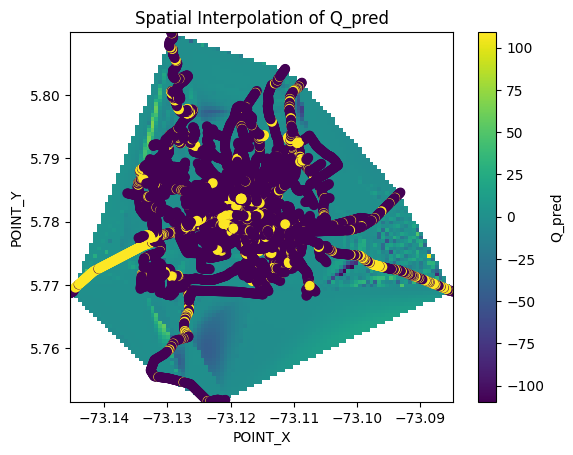

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

# 假设已经有一个DataFrame 'df' 包含 'POINT_X', 'POINT_Y', 和 'Q_pred'列

# 创建网格用于插值
grid_x, grid_y = np.mgrid[
    min(merged_df['POINT_X']):max(merged_df['POINT_X']):100j,
    min(merged_df['POINT_Y']):max(merged_df['POINT_Y']):100j
]

# 插值
grid_z = griddata(
    merged_df[['POINT_X', 'POINT_Y']].values,
    merged_df['Q_pred'].values,
    (grid_x, grid_y),
    method='cubic'
)

# 绘制原始点
plt.scatter(merged_df['POINT_X'], merged_df['POINT_Y'], c=merged_df['Q_pred'], cmap='viridis')

# 绘制插值结果
plt.imshow(grid_z.T, extent=(min(merged_df['POINT_X']), max(merged_df['POINT_X']), min(merged_df['POINT_Y']), max(merged_df['POINT_Y'])), origin='lower', cmap='viridis')
plt.colorbar(label='Q_pred')

# 设置图表标题和标签
plt.title('Spatial Interpolation of Q_pred')
plt.xlabel('POINT_X')
plt.ylabel('POINT_Y')

# 显示绘图
plt.show()
